In [1]:
# basic imports
import pandas as pd
import numpy as np

# display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# custom helper functions
%load_ext autoreload
%autoreload 2
from helper import *

# view plotly in jupyter 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [ ]:
original_df = pd.read_csv('../data/companies_1.csv')

#### Preprocsessing and merging with class pipelines

In [ ]:
pre_df = preprocess(original_df)

In [ ]:
df = pre_df.pipeline(country_code='USA', drop_lst=['permalink' ,'name', 'homepage_url', 'country_code'])

In [ ]:
'''Source: https://hub.arcgis.com/datasets/a2a8826c4ba44f89a684000fe7c05b8c_0/data?geometry=-124.929%2C29.271%2C125.560%2C67.358&page=5'''
gdp_df = pd.read_csv('../data/Gross_Domestic_Product_(GDP)_by_state,_1997-2016.csv')

'''Source: https://simplemaps.com/data/us-zips'''
zip_df = pd.read_csv('../data/uszips.csv')

'''Source: https://data.world/education/university-rankings-2017'''
edu_df = pd.read_csv('../data/National-Universities-Rankings.csv', encoding='latin-1')

In [ ]:
combined_df = merge_mult_df(df)
combined_df = combined_df.merge_pipeline(gdp_df, zip_df, edu_df)

In [ ]:
round_two = round_two_engineering(combined_df)
df = round_two.engineering_pipeline()

In [ ]:
# df.to_csv('../data/final_csv.csv', index=False)

In [2]:
df = pd.read_csv('../data/final_csv.csv')

#### EDA

##### Top 10 States

In [4]:
# group states by count
top_ten_states = df.groupby('state_code').count().sort_values(by='category_list', ascending=False).iloc[:10, 0:2]

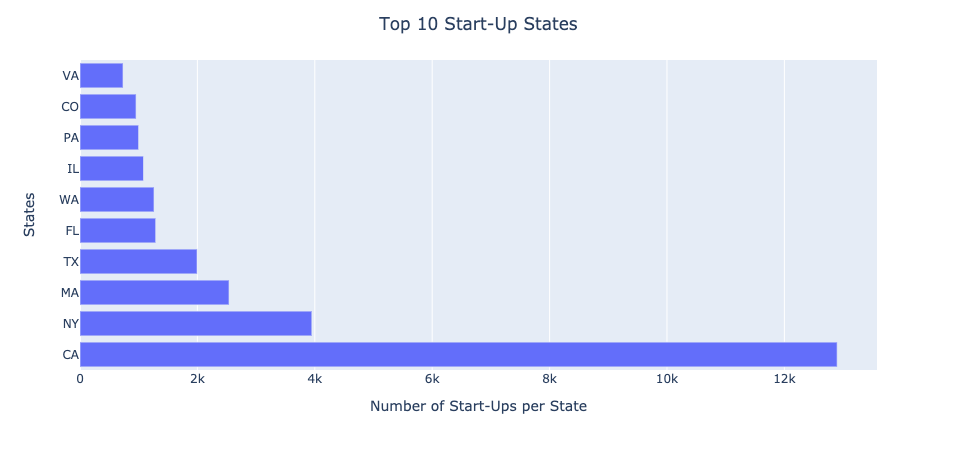

In [5]:
fig = px.bar(top_ten_states, x='category_list')

fig.update_layout(
    xaxis_title_text='Number of Start-Ups per State',
    yaxis_title_text='States',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Start-Up States',
    title_x=0.5,
)
# fig.write_image("../images/top_states.png")
fig.show();

##### Top 10 Regions

In [ ]:
top_ten_regions = df.groupby('region').count().sort_values(by='category_list', ascending=False).iloc[:10, 0:2]
top_ten_regions

In [ ]:
fig = px.bar(top_ten_regions, x='category_list')

fig.update_layout(
    xaxis_title_text='Number of Start-Ups per Region',
    yaxis_title_text='Regions',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Start-Up Regions',
    title_x=0.5,
)
# fig.write_image("../images/top_regions.png")
fig.show();

In [ ]:
df.status = df.status.map({0: 0, 1: 1, 2: 1, 3: 1})

In [ ]:
successful_regions = df.groupby('region').mean().ratio_success_by_region.sort_values(ascending=False)
# successful_regions = successful_regions[successful_regions != 1][:10]

# unsuccessful_regions = df.groupby('region').mean().ratio_fail_by_region.sort_values(ascending=False)
# unsuccessful_regions = unsuccessful_regions[(unsuccessful_regions != 0) & (unsuccessful_regions != .5)][:10]
# unsuccessful_regions

In [ ]:
successful_cats = df[df.status==1].category_list.value_counts()
successful_cats= successful_cats[:10]

In [ ]:
unsuccessful_cats = df[df.status==0].category_list.value_counts()
unsuccessful_cats = unsuccessful_cats[:10]

In [ ]:
fig = px.bar(successful_cats, x='category_list')

fig.update_layout(
    xaxis_title_text='Count of Successful Categories',
    yaxis_title_text='Sectors',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Most Successful Categories',
    title_x=0.5,
)
fig.write_image("../images/top_successful_cats.png")
fig.show();

In [ ]:
fig = px.bar(unsuccessful_cats, x='category_list')

fig.update_layout(
    xaxis_title_text='Count of Unsuccessful Categories',
    yaxis_title_text='Sectors',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Least Successful Categories',
    title_x=0.5,
)
fig.write_image("../images/top_unsuccessful_cats.png")
fig.show();

In [ ]:
fig = px.bar(successful_regions, x='ratio_success_by_region')

fig.update_layout(
    xaxis_title_text='% Successful Companies per Region',
    yaxis_title_text='Regions',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Most Successful Regions',
    title_x=0.5,
)
fig.write_image("../images/top_successful_regions.png")
fig.show();

In [ ]:
fig = px.bar(unsuccessful_regions, x='ratio_fail_by_region')

fig.update_layout(
    xaxis_title_text='% Unsuccessful Companies per Region',
    yaxis_title_text='Regions',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Least Successful Regions',
    title_x=0.5,
)
fig.write_image("../images/top_least_successful_regions.png")
fig.show();

#### What makes these regions successful or unsuccessful?

In [ ]:
ur = unsuccessful_regions.index.tolist()
sr = successful_regions.index.tolist()

ur_mask = df['region'].isin(ur)
sr_mask = df['region'].isin(sr)
unsuccessful_df = df[ur_mask]
successful_df = df[sr_mask]

In [ ]:
ur_group = unsuccessful_df.groupby('region').mean()
sr_group = successful_df.groupby('region').mean()

In [ ]:
plot_regions(target='region_count', ur_df=ur_group, sr_df=sr_group, title_text='Successful vs Unsuccessful Regions', filename='suc_unsuc_by_region_count')

In [ ]:
fig = plot_regions(target='funding_per_region_avg',
             ur_df=ur_group, sr_df=sr_group,
             title_text='Successful vs Unsuccessful Average Funding',
             filename='suc_unsuc_avg_funding')
fig

In [ ]:

fig = plot_regions(target='pop_per_city',
             ur_df=ur_group, sr_df=sr_group,
             title_text='Successful vs Unsuccessful Average Population',
             filename='suc_unsuc_avg_pop')
fig

In [ ]:

fig = plot_regions(target='pop_density_per_city',
             ur_df=ur_group, sr_df=sr_group,
             title_text='Successful vs Unsuccessful Average Population Density',
             filename='suc_unsuc_avg_pop_density')
fig

In [ ]:

fig = plot_regions(target='num_top_univ_per_city',
             ur_df=ur_group, sr_df=sr_group,
             title_text='Successful vs Unsuccessful Number of Top Universities in Region',
             filename='suc_unsuc_avg_top_univ')
fig

In [ ]:

fig = plot_regions(target='city_count',
             ur_df=ur_group, sr_df=sr_group,
             title_text='Number of Startups in City',
             filename='num_of_startups')
fig

##### Top 10 Funded Regions

In [ ]:
top_ten_funding_regions = df.groupby('region').mean().sort_values(by='funding_per_region_avg', ascending=False).iloc[0:10, :]

In [ ]:
fig = px.bar(top_ten_funding_regions, x='funding_per_region_avg')

fig.update_layout(
    xaxis_title_text='Median Investment',
    yaxis_title_text='Regions',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Start-Up Regions By Funding',
    title_x=0.5,
)
# fig.write_image("../images/top_funding_regions.png")
fig.show();

#####  Average Funding

In [ ]:
df.status = df.status.map({0: 'defunct', 1: 'active', 2: 'aquired', 3: 'ipo'})
status_series = df.groupby('status').median().average_funding

In [ ]:
status_series

In [ ]:
fig = px.bar(status_series, x=status_series.index, y='average_funding')
fig.update_layout(
    xaxis_title_text='Company Status',
    yaxis_title_text='Average Funding',
    bargap=0.2, showlegend=True,
    title_text='Average Funding per Company Status',
    title_x=0.5,
)
# fig.write_image("../images/average_funding.png")
fig.show()

In [ ]:
unique_industry_series = df.groupby('status').median().unique_industry_count_in_city
unique_industry_series

In [ ]:
fig = px.bar(unique_industry_series, x=unique_industry_series.index, y='unique_industry_count_in_city')
fig.update_layout(
    xaxis_title_text='Company Status',
    yaxis_title_text='Median Count of Unique Industries',
    bargap=0.2, showlegend=True,
    title_text='Median Unique Industries In City',
    title_x=0.5,
)
# fig.write_image("../images/average_funding.png")
fig.show()

In [ ]:
first_last_funding = df.groupby('status').median().first_last_funding

In [ ]:
fig = px.bar(first_last_funding, x=first_last_funding.index, y='first_last_funding')
fig.update_layout(
    xaxis_title_text='Company Status',
    yaxis_title_text='Median Time Between First and Last Funding',
    bargap=0.2, showlegend=True,
    title_text='Median Time Between First and Last Funding Periods',
    title_x=0.5,
)
# fig.write_image("../images/average_funding.png")
fig.show()

In [ ]:
df_1 = df[(df.status == 'defunct') | (df.status =='active')]
df_1['status'] = df_1.status.map({'active': 1, 'defunct': 0})

In [ ]:

fig = px.density_mapbox(df_1, lat='lat', lon='long', z='status', radius=1.5,
                        center=dict(lat=38, lon=-100), zoom=3,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
quick_test = df

In [ ]:
quick_test = quick_test[(quick_test.status == 'operating') | (quick_test.status == 'acquired')]

In [ ]:
import imblearn

In [ ]:
y = quick_test.status
X = quick_test[['average_funding', 'len_of_company_name', 'len_of_company_url', 'num_of_company_cat', 'first_last_funding']]

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dum_pred = dummy_clf.predict(X)

In [ ]:
pd.crosstab(y, dum_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
df.head()

#### Looking at SF Bay Area

In [ ]:
sf_df = df[df.region == 'SF Bay Area']
sf_df.status = sf_df.status.map({0: 0, 1: 1, 2: 1, 3: 1})

In [ ]:
fig = px.density_mapbox(sf_df, lat='lat', lon='long', z='status', radius=5,
                        center=dict(lat=37.7, lon=-122), zoom=7,
                        mapbox_style="stamen-terrain")
fig.update_layout(
        bargap=0.2, showlegend=True,
        title_text='Bay Area Heatmap',
        title_x=0.5,
    )
# fig.write_image(f"../images/bay_area_heatmap.png")
fig.show()

In [ ]:
sf_df_mean = sf_df.groupby('status').mean()

In [ ]:
def plot_suc_fail(group_frame, y, x_name, title, filename):
    fig = px.bar(sf_df_mean, x=sf_df_mean.index, y=y)
    fig.update_layout(
        xaxis_title_text='Company Status',
        yaxis_title_text=x_name,
        bargap=0.2, showlegend=True,
        title_text=title,
        title_x=0.5,
    )
#     fig.write_image(f"../images/{filename}.png")
    return fig

In [ ]:
plot_suc_fail(sf_df_mean, y='average_funding', x_name='Average Funding',
              title='Average Funding Per Company in Bay Area',
             filename='average_funding')

In [ ]:
plot_suc_fail(sf_df_mean, y='city_count', x_name='Number of Startups in Cities',
              title='Number of Startups per City in Bay Area',
             filename='num_city_sf_bay')

In [ ]:
plot_suc_fail(sf_df_mean, y='pop_density_per_city', x_name='Population Density per City',
              title='Population Density per City in Bay Area',
             filename='pop_density_sf_bay')

In [ ]:
plot_suc_fail(sf_df_mean, y='num_of_company_cat', x_name='Population Density per City',
              title='Average Number of Subcategories per Company in Bay Area',
             filename='pop_density_sf_bay')

In [ ]:
sf_df_count = sf_df.groupby('city').count().sort_values(by='status', ascending=False).iloc[:10, :]
top_city_count = sf_df_count.index.tolist()
top_city_count

top_10_bay = sf_df[sf_df['city'].isin(top_city_count)]
top_10_bay_mean = top_10_bay.groupby('city').mean()
top_10_bay_mean
# top_10_bay_med = top_10_bay.groupby(['city']).median()
# top_10_bay_med


In [ ]:
fig = px.bar(top_10_bay_mean, x=top_10_bay_mean.index, y='average_funding', color='status')
fig.update_layout(
    xaxis_title_text='City Name',
    yaxis_title_text='Mean Funding Per City',
    bargap=0.2, showlegend=True,
    title_text='Mean Funding Per City and Success Rates',
    title_x=0.5
)
# fig.write_image(f"../images/average_funding_per_city.png")
fig

In [ ]:
fig = px.bar(top_10_bay_mean, x=top_10_bay_mean.index, y='city_count', color='status')
fig.update_layout(
    xaxis_title_text='City Name',
    yaxis_title_text='Number of Startups',
    bargap=0.2, showlegend=True,
    title_text='Number of Startups Per City',
    title_x=0.5
)
# fig.write_image(f"../images/number_of_startups.png")
fig

In [ ]:
fig = px.bar(top_10_bay_mean, x=top_10_bay_mean.index, y='pop_density_per_city', color='status')
fig.update_layout(
    xaxis_title_text='City Name',
    yaxis_title_text='Population Density',
    bargap=0.2, showlegend=True,
    title_text='Population Density and Success Rates Per City',
    title_x=0.5
)
# fig.write_image(f"../images/population_density.png")
fig

In [ ]:

fig = px.bar(top_10_bay_mean, x=top_10_bay_mean.index, y='num_of_company_cat', color='status')
fig.update_layout(
    xaxis_title_text='City Name',
    yaxis_title_text='Average number of Categories',
    bargap=0.2, showlegend=True,
    title_text='verage number of Categories Per Startup Per City',
    title_x=0.5
)
# fig.write_image(f"../images/population_density.png")
fig

In [ ]:
tucson = df[df.region == 'Tucson'].category_list.value_counts()[:10]
tucson

In [ ]:
fig = px.bar(tucson, x='category_list')

fig.update_layout(
    xaxis_title_text='Number of Categories in Tucson',
    yaxis_title_text='Company Categories',
    bargap=0.2, showlegend=True,
    title_text='Top 10 Companies in Tucson',
    title_x=0.5,
)
# fig.write_image("../images/tucson_cat.png")
fig.show();

In [21]:
fig = px.bar(stat_group, x='category_list')

fig.update_layout(
    xaxis_title_text='classes',
    yaxis_title_text='count',
    bargap=0.2, showlegend=True,
    title_text='Class Balance',
    title_x=0.5,
)
# fig.write_image("../images/class_balance.png")
fig.show();

NameError: name 'stat_group' is not defined